## Project 1 - NLP Text Classification (Group 4)

In [3]:
# importing the module : 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import re
from nltk.corpus import stopwords
import warnings
from nlp_id.lemmatizer import Lemmatizer
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input, Embedding, BatchNormalization, Conv1D, GlobalMaxPooling1D, SimpleRNN, Bidirectional
from keras.regularizers import l2
from keras.optimizers import RMSprop

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score
import keras_tuner as kt

import pickle

from umap import UMAP
from sklearn.pipeline import Pipeline

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from keras.callbacks import EarlyStopping
from nlp_id import StopWord

from xgboost import XGBClassifier
from indoNLP.preprocessing import emoji_to_words, replace_slang, pipeline, remove_stopwords

d:\Conda\envs\tensorflowENV\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
kata_tidak_baku = {"gak":"tidak","ga":"tidak","@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

In [3]:
# read the csv file : 
data = pd.read_csv("tweet.csv",index_col = 0)
data

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [466]:
data.loc[data.duplicated()]

,sentimen,tweet


In [457]:
pos.head(1)

,sentimen,tweet,panjangTweet
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",127


In [478]:
hehehe = 'Lha itu artinya ekonomi anda baik"" saja ,,malah bisa pakai 12kg'

In [480]:
pd.DataFrame({"Real Text":hehehe,"Processed Text":preProcessText([hehehe])})

,Real Text,Processed Text
0,"Lha itu artinya ekonomi anda baik"""" saja ,,mal...",lah itu artinya ekonomi anda baik saja bahkan ...


In [4]:
# find whether the data is balanced or imbalanced
value_counts = data["sentimen"].value_counts()

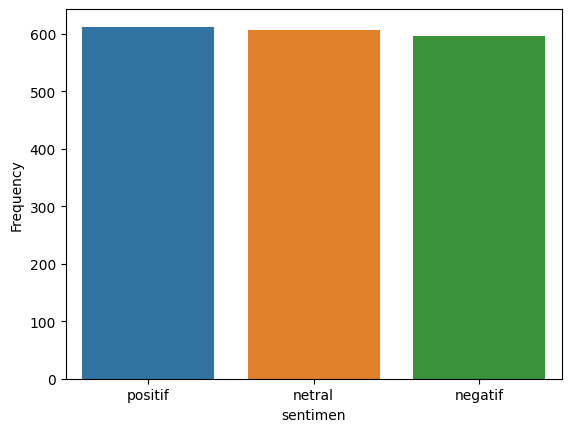

In [5]:
sns.barplot(x = value_counts.index, y = value_counts.values, hue = value_counts.index,palette = "tab10")
plt.ylabel("Frequency")
plt.show()

In [6]:
def ff (x) : 
    if x == "negatif" : 
        return 0
    elif x == "netral" : 
        return 1 
    else : 
        return 2

In [7]:
haha = data["sentimen"].apply(ff)

In [8]:
haha.value_counts()

sentimen
2    612
1    607
0    596
Name: count, dtype: int64

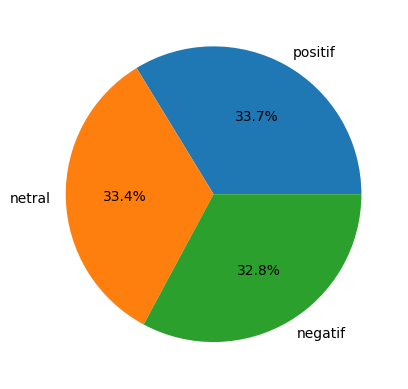

In [9]:
plt.pie(haha.value_counts(), labels=["positif","netral","negatif"],autopct = "%.1f%%")
plt.show()

In [10]:
pos = data.loc[data["sentimen"] == "positif"]
neg = data.loc[data["sentimen"] == "negatif"]
net = data.loc[data["sentimen"] == "netral"]

In [11]:
def hitungPanjang(x) : 
    x = re.sub(pattern = "[^a-zA-Z0-9\s]", repl = " ", string = x)
    x = re.sub(pattern = "\s*", repl = " ", string = x)
    token = x.split(" ")
    return len(token)

In [12]:
pos['panjangTweet'] = pos["tweet"].apply(hitungPanjang)

In [13]:
neg['panjangTweet'] = neg["tweet"].apply(hitungPanjang)

In [14]:
net['panjangTweet'] = net["tweet"].apply(hitungPanjang)

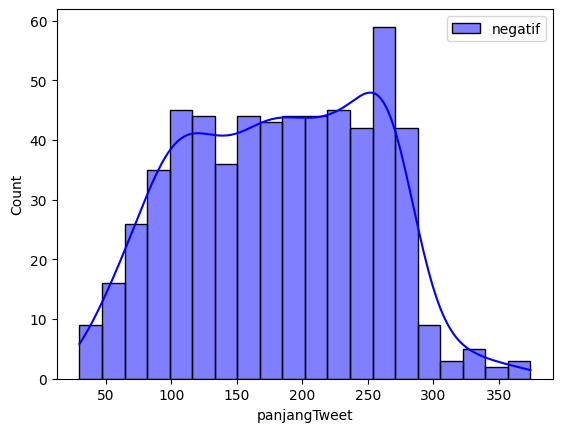

In [15]:
sns.histplot(neg["panjangTweet"], kde = True, color = "blue", label = "negatif", bins = 20)
plt.legend()
plt.show()

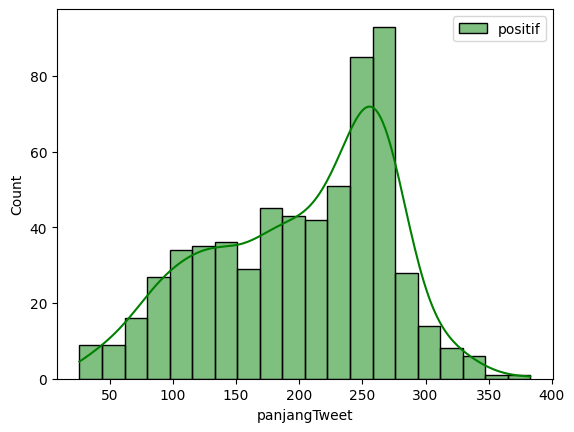

In [16]:
sns.histplot(pos["panjangTweet"], kde = True, color = "green", label = "positif", bins = 20)
plt.legend()
plt.show()

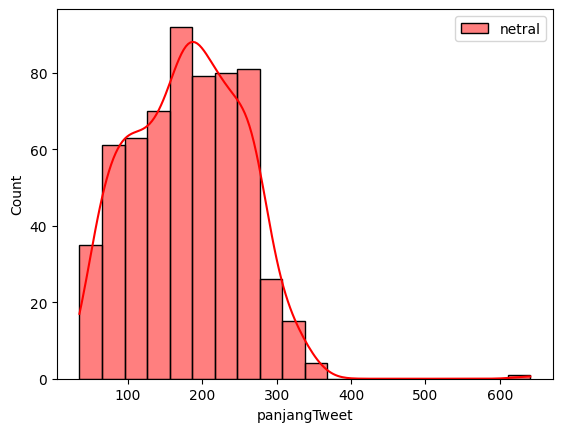

In [17]:
sns.histplot(net["panjangTweet"], kde = True, color = "red", label = "netral", bins = 20)
plt.legend()
plt.show()

In [18]:
def perhitunganEachSentiment(teks,sw_mode = False) : 
    def bersihkan(isi) : 
        hasil = []
        for _ in isi : 
            _  = re.sub(pattern = "[^a-zA-Z\s]", repl = "", string = _)
            hasil.append(_)
        return hasil
    teks = bersihkan(teks)
    if sw_mode : 
        sw = stopwords.words("indonesian")
        for janganHapus in ["tidak","gak","ga"] : 
            if janganHapus in sw : 
                sw.remove(janganHapus)
    else : 
        sw = []
    vectorizer_model = CountVectorizer(lowercase=True,stop_words=sw,ngram_range = (1,4))
    hasil = vectorizer_model.fit_transform(teks)
    return pd.DataFrame(hasil.toarray(),columns = vectorizer_model.get_feature_names_out())


In [19]:
pos_sentimen = data.loc[data["sentimen"] == "positif","tweet"]
neg_sentimen = data.loc[data["sentimen"] == "negatif","tweet"]
net_sentimen = data.loc[data["sentimen"] == "netral","tweet"]

In [20]:
pos_sentimen = perhitunganEachSentiment(pos_sentimen).sum().sort_values(ascending = False).head(30)
neg_sentimen = perhitunganEachSentiment(neg_sentimen).sum().sort_values(ascending = False).head(30)
net_sentimen = perhitunganEachSentiment(net_sentimen).sum().sort_values(ascending = False).head(30)

## Stop Words Removal Not Active

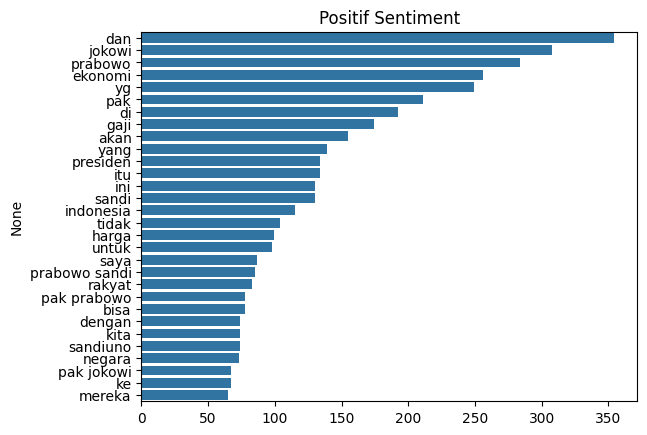

In [21]:
sns.barplot(x = pos_sentimen.values, y = pos_sentimen.index)
plt.title("Positif Sentiment")
plt.show()

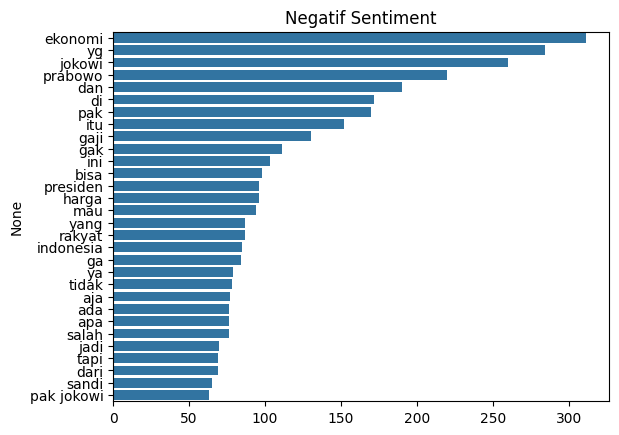

In [22]:
sns.barplot(x = neg_sentimen.values, y = neg_sentimen.index)
plt.title("Negatif Sentiment")
plt.show()

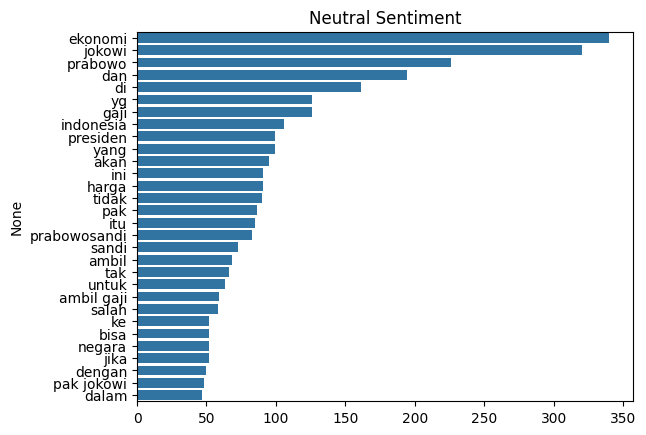

In [23]:
sns.barplot(x = net_sentimen.values, y = net_sentimen.index)
plt.title("Neutral Sentiment")
plt.show()

## Stop Words Removal Active

In [24]:
pos_sentimen = data.loc[data["sentimen"] == "positif","tweet"]
neg_sentimen = data.loc[data["sentimen"] == "negatif","tweet"]
net_sentimen = data.loc[data["sentimen"] == "netral","tweet"]

In [25]:
pos_sentimen = perhitunganEachSentiment(pos_sentimen,sw_mode=True).sum().sort_values(ascending = False).head(30)
neg_sentimen = perhitunganEachSentiment(neg_sentimen,sw_mode=True).sum().sort_values(ascending = False).head(30)
net_sentimen = perhitunganEachSentiment(net_sentimen,sw_mode=True).sum().sort_values(ascending = False).head(30)

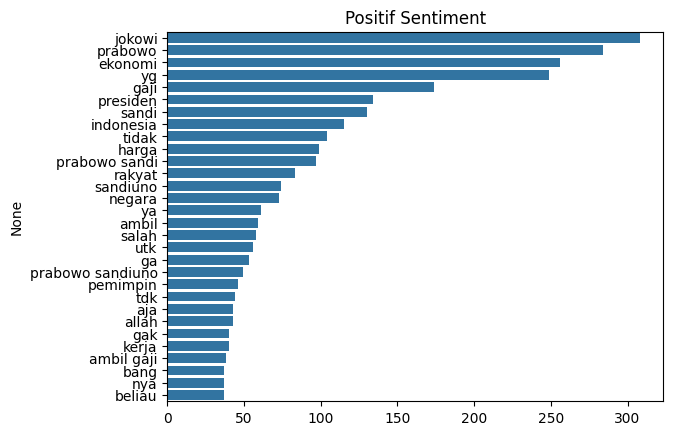

In [26]:
sns.barplot(x = pos_sentimen.values, y = pos_sentimen.index)
plt.title("Positif Sentiment")
plt.show()

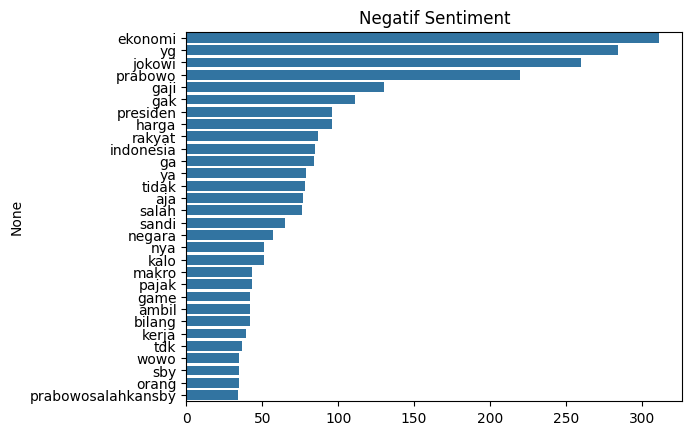

In [27]:
sns.barplot(x = neg_sentimen.values, y = neg_sentimen.index)
plt.title("Negatif Sentiment")
plt.show()

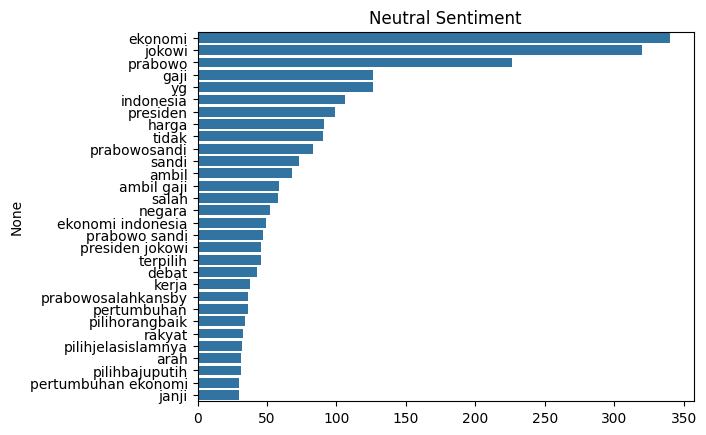

In [28]:
sns.barplot(x = net_sentimen.values, y = net_sentimen.index)
plt.title("Neutral Sentiment")
plt.show()

In [29]:
att_pos = []
for sentence in pos["tweet"] : 
    pattern = re.compile("@[a-zA-Z0-9]+")
    ketemu = pattern.findall(sentence)
    if ketemu : 
        att_pos.extend(ketemu)

In [30]:
att_neg = []
for sentence in neg["tweet"] : 
    pattern = re.compile("@[a-zA-Z0-9]+")
    ketemu = pattern.findall(sentence)
    if ketemu : 
        att_neg.extend(ketemu)

In [31]:
att_net = []
for sentence in net["tweet"] : 
    pattern = re.compile("@[a-zA-Z0-9]+")
    ketemu = pattern.findall(sentence)
    if ketemu : 
        att_net.extend(ketemu)

In [32]:
att_total = []
for sentence in data["tweet"] : 
    pattern = re.compile("@[a-zA-Z0-9]+")
    ketemu = pattern.findall(sentence)
    if ketemu : 
        att_total.extend(ketemu)

In [33]:
def mencari(data, rePattern) : 
    hasil = []
    for sentence in data["tweet"] : 
        pattern = re.compile(rePattern)
        ketemu = pattern.findall(sentence)
        if ketemu : 
            hasil.extend(ketemu)

    hasil = pd.DataFrame({"Kolom":hasil})
    hasil = hasil.groupby(by = "Kolom").value_counts().sort_values(ascending = False).head(20)
    return hasil

In [34]:
top_20_att = mencari(data, "@[a-zA-Z0-9]+")

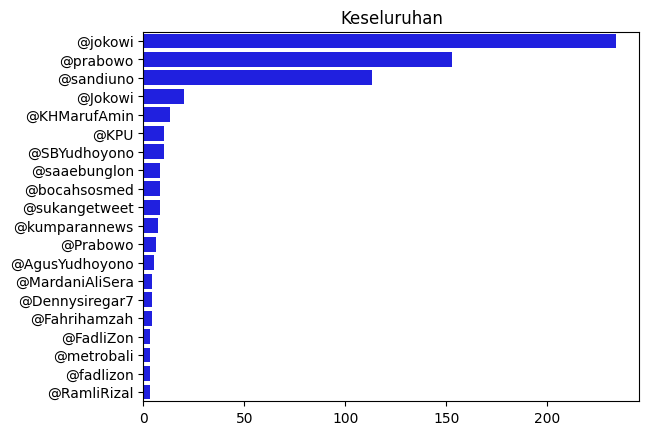

In [467]:
sns.barplot(x = top_20_att.values, y = top_20_att.index, color = "blue")
plt.title("Keseluruhan")
plt.ylabel("")
plt.show()

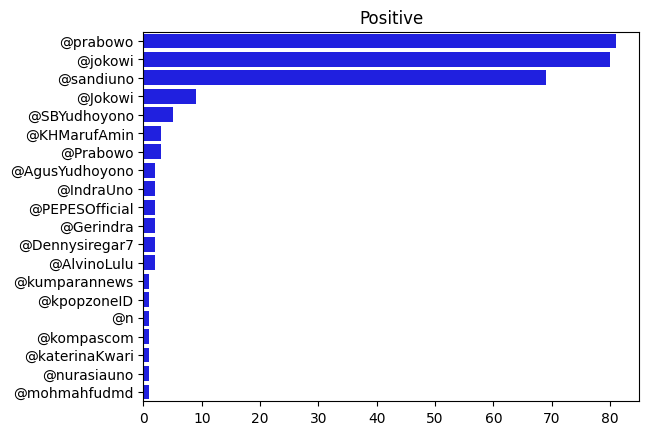

In [468]:
top_20_att_pos = mencari(pos, "@[a-zA-Z0-9]+")
sns.barplot(x = top_20_att_pos.values, y = top_20_att_pos.index, color = "blue")
plt.title("Positive")
plt.ylabel("")
plt.show()

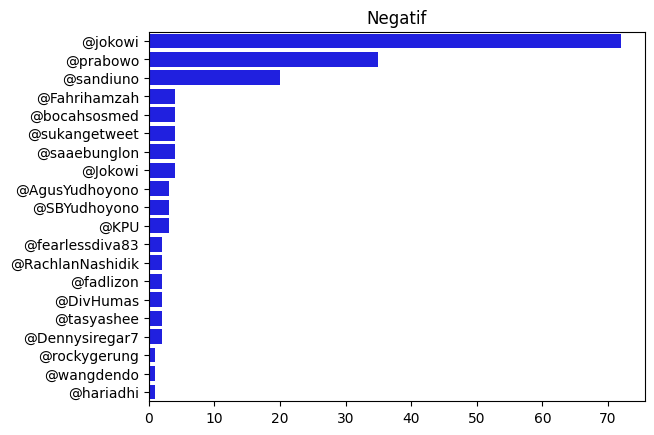

In [469]:
top_20_att_neg = mencari(neg, "@[a-zA-Z0-9]+")
sns.barplot(x = top_20_att_neg.values, y = top_20_att_neg.index, color = "blue")
plt.ylabel("")
plt.title("Negatif")
plt.show()

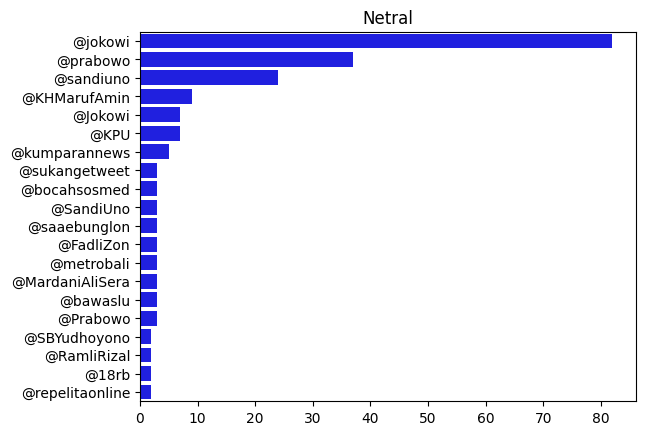

In [470]:
top_20_att_net = mencari(net, "@[a-zA-Z0-9]+")
sns.barplot(x = top_20_att_net.values, y = top_20_att_net.index, color = "blue")
plt.ylabel("")
plt.title("Netral")
plt.show()

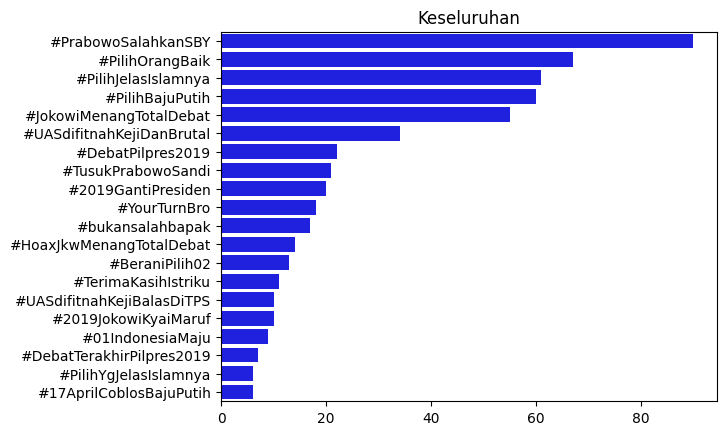

In [471]:
top_20_hashtag = mencari(data, "#[a-zA-Z0-9]+")
sns.barplot(x = top_20_hashtag.values, y = top_20_hashtag.index, color = "blue")
plt.ylabel("")
plt.title("Keseluruhan")
plt.show()

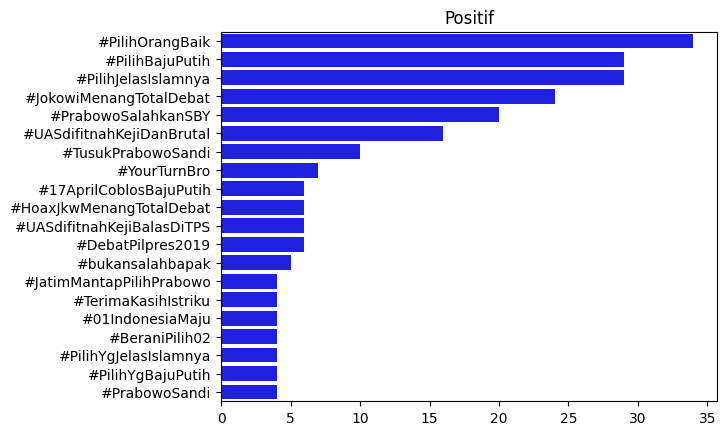

In [472]:
top_20_hashtag_pos = mencari(pos, "#[a-zA-Z0-9]+")
sns.barplot(x = top_20_hashtag_pos.values, y = top_20_hashtag_pos.index, color = "blue")
plt.ylabel("")
plt.title("Positif")
plt.show()

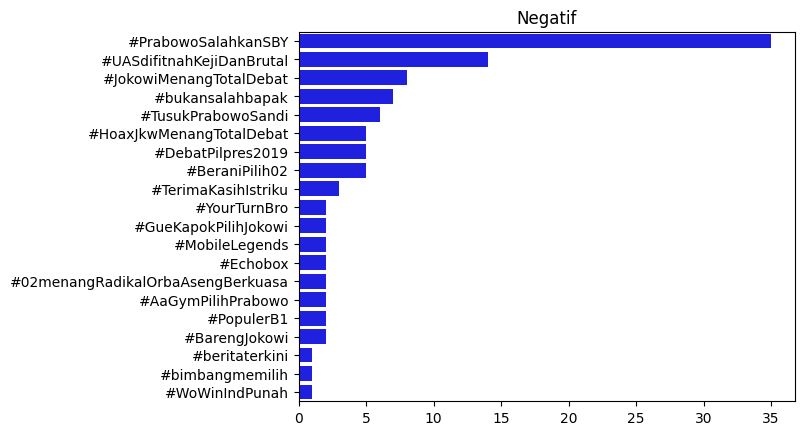

In [473]:
top_20_hashtag_neg = mencari(neg, "#[a-zA-Z0-9]+")
sns.barplot(x = top_20_hashtag_neg.values, y = top_20_hashtag_neg.index, color = "blue")
plt.ylabel("")
plt.title("Negatif")
plt.show()

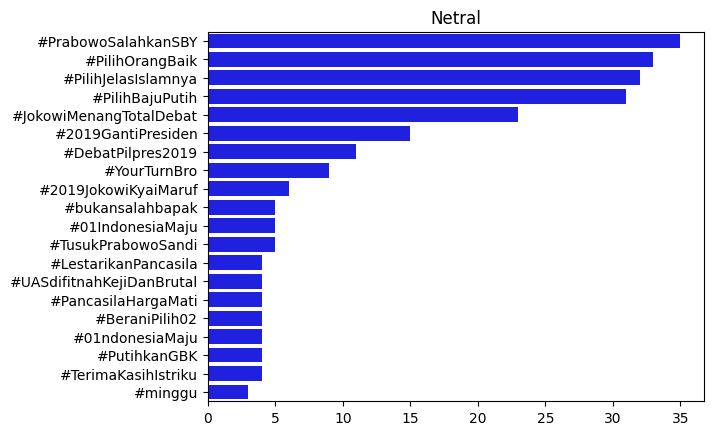

In [474]:
top_20_hashtag_net = mencari(net, "#[a-zA-Z0-9]+")
sns.barplot(x = top_20_hashtag_net.values, y = top_20_hashtag_net.index, color = "blue")
plt.ylabel("")
plt.title("Netral")
plt.show()

In [43]:
url_arr = mencari(data, "(https?://[^\s]+|pic.[^\s]+)")
url_arr

Kolom
https://www.youtube.com/watch?v=p8qVUqCF9ioÂ                                                                                       9
https://bit.ly/2UyAoiRÂ                                                                                                            8
https://nasional.kompas.com/read/2018/09/24/22563621/disaksikan-sandiaga-jokowi-dapat-penghargaan-tokoh-pemerataan-pembangunanÂ    7
http://beritahati.com/berita/38106/Warga-Puncak-Papua-Era-Jokowi-harga-BBM-di-Papua-sama-dengan-pulau-JawaÂ                        7
https://bit.ly/2X8pIEvÂ                                                                                                            6
https://bit.ly/2DgcEp3Â                                                                                                            5
https://bit.ly/2GkwvoWÂ                                                                                                            5
https://bit.ly/2OgymxtÂ                                        

## Process Penelitian Data Sudah Selesai, masuk ke Intinya

In [519]:
pipe = pipeline([emoji_to_words, replace_slang])

In [520]:
def preProcessText(text) : 
    global kata_tidak_baku
    hasil = []
    stopWord_List = [
        "di", "ke", "dari", "pada", 
        "yang", "untuk", "dengan", 
        "dan", "atau", "tetapi", "namun", "serta", 
        "jika", "kalau", "agar", "supaya", 
        "karena", "sebab", "sehingga", "maka", 
        "dalam", "atas", "antara", "oleh", 
        "secara", "terhadap", "tentang", 
        "sampai", "hingga", "sejak", 
        "ini", "itu", "sini", "situ", "sana", 
        "ia", "dia", "mereka", "kami", "kita", "kamu", "anda", 
        "nya", 
        "si", "sang", 
        "sangat", "amat", "terlalu", 
        "juga", "pula", 
        "hanya", "cuma", "sekadar", 
        "sudah", "telah", "selesai", 
        "akan", "hendak", "mau", 
        "sedang", "lagi", 
        "pernah", 
        "sekali", "saja", 
        "nanti", "tadi", 
        "baru", 
        "wah", "aduh", "ah", 
        "adalah", "ialah", "merupakan", 
        "ada", 
        "lah", "kah", "pun"
    ]
    for sentence in text : 
        sentence = sentence.lower()
        sentence = re.sub("(https?://[^\s]+|pic.[^\s]+)", repl = " ",string = sentence)
        sentence = re.sub(pattern = "@[^\s]+", repl = " ", string = sentence)
        sentence = re.sub(pattern = "#[^\s]+", repl = " ", string = sentence)
        sentence = re.sub(pattern = "[^a-zA-Z\s]", repl = " ", string = sentence)
        sentence = re.sub(pattern = "\s+",repl = " ", string = sentence)
        sentence = pipe(sentence)
        sementara = []
        for word in sentence.split(" ") : 
            if word in kata_tidak_baku.keys() : 
                if kata_tidak_baku[word] not in stopWord_List: 
                    sementara.append(kata_tidak_baku[word])
            else : 
                if word not in stopWord_List and len(word)>2: 
                    sementara.append(word)
                    
        sentence = " ".join(sementara).strip()
        hasil.append(sentence)
    return hasil

In [521]:
data

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [522]:
train_data, test_data, train_label, test_label = train_test_split(data.iloc[:,-1],data.iloc[:,0], test_size = 0.15, random_state=48, stratify=data.iloc[:,0])

In [523]:
LABELENCODER = LabelEncoder()

In [524]:
train_label = LABELENCODER.fit_transform(train_label)
train_label

array([2, 2, 1, ..., 1, 2, 2])

In [525]:
train_data_processed = preProcessText(train_data)

In [526]:
with open("hasil.txt","a") as f :
    for i in train_data_processed :  
        f.write(i)
        f.write("\n")

In [527]:
hasil_processed_text = pd.DataFrame({"Raw":train_data, "Processed":train_data_processed})

In [528]:
hasil_processed_text.to_csv("hasilProcessed.csv")

In [529]:
train_data = train_data_processed

## Masuk ke Tahap Word2Vec

In [530]:
# modelWord2Vec = Word2Vec(vector_size = 300, window = 3, sg = 1)

In [531]:
# masukanWord2Vec = [kata.split(" ") for kata in train_data]

In [532]:
# modelWord2Vec.build_vocab(masukanWord2Vec)

In [533]:
# modelWord2Vec.train(masukanWord2Vec, epochs = modelWord2Vec.epochs, total_examples=modelWord2Vec.corpus_count)

In [534]:
# modelWord2Vec.wv.most_similar("goblock")

## Masuk ke tahap Vectorizing Text nya 

In [535]:
vectorizer = CountVectorizer(lowercase=True, ngram_range = (1,3), min_df = 1)

In [536]:
train_data_vectorizer = vectorizer.fit_transform(train_data)

In [537]:
train_data_vectorizer.toarray()

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [538]:
train_label

array([2, 2, 1, ..., 1, 2, 2])

In [539]:
test_data = preProcessText(test_data)
test_data_vectorizer = vectorizer.transform(test_data)

In [540]:
test_data_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [541]:
test_label = LABELENCODER.transform(test_label)
test_label

array([1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0,
       2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2,
       1, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0,
       0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1,
       2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2,
       1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 0, 0])

## Latih Model 

## 1. Use Random Forest

In [235]:
modelRandomForest = RandomForestClassifier(random_state=42, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 200)

In [236]:
# param_grid = {
#     'n_estimators': [200, 500],           
#     'max_depth': [10, 30, None],                
#     'min_samples_split': [2, 5, 10],              
#     'min_samples_leaf': [1, 2, 4],                  
    # 'max_features': ['auto', 'sqrt', 'log2'],    
    # 'bootstrap': [True, False],                    
    # 'criterion': ['gini', 'entropy']            
# }
# gridSearchModel = GridSearchCV(estimator = modelRandomForest, param_grid = param_grid,n_jobs = -1, cv = 3)
# gridSearchModel.fit(train_data_vectorizer.toarray(), train_label)
# model = gridSearchModel.best_estimator_
# model

In [542]:
modelRandomForest.fit(train_data_vectorizer.toarray(), train_label)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [543]:
prediksi = modelRandomForest.predict(test_data_vectorizer.toarray())

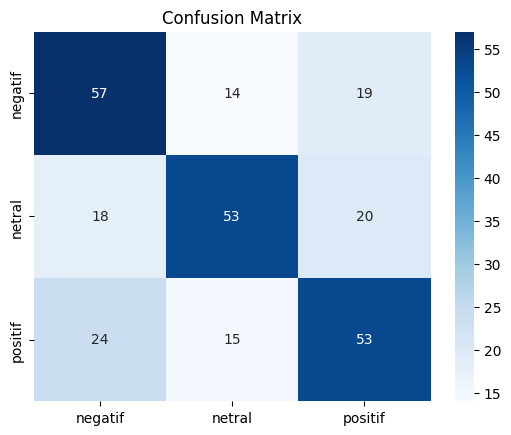

In [544]:
sns.heatmap(confusion_matrix(y_true = test_label, y_pred = prediksi),annot = True,fmt = "d",xticklabels=["negatif","netral","positif"], yticklabels=["negatif","netral","positif"], cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

In [545]:
# with open("randomForest.pkl","rb") as f : 
#     model = pickle.load(f)

In [546]:
accuracy = accuracy_score(y_true = test_label, y_pred = prediksi)
print(f"Accuracy Random Forest : {accuracy}") 

Accuracy Random Forest : 0.5970695970695971


In [547]:
# with open('randomForest.pkl',"wb") as f : 
#     pickle.dump(model,f)

In [548]:
accuracy_random_forest = accuracy

In [549]:
accuracy_random_forest

0.5970695970695971

In [495]:
from sklearn.metrics import classification_report

In [496]:
print(classification_report(y_true = test_label, y_pred = prediksi))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       119
           1       0.69      0.63      0.66       121
           2       0.66      0.64      0.65       123

    accuracy                           0.66       363
   macro avg       0.66      0.66      0.66       363
weighted avg       0.66      0.66      0.66       363



## 2. Use CatBoost

In [247]:
from catboost import CatBoostClassifier

In [248]:
modelCatboost = CatBoostClassifier(random_state=42, iterations = 500, learning_rate = 0.1, depth = 6, l2_leaf_reg = 3)

In [249]:
modelCatboost.fit(train_data_vectorizer.toarray(), train_label)

0:	learn: 1.0954453	total: 255ms	remaining: 2m 7s
1:	learn: 1.0890489	total: 397ms	remaining: 1m 38s
2:	learn: 1.0836225	total: 534ms	remaining: 1m 28s
3:	learn: 1.0818255	total: 661ms	remaining: 1m 21s
4:	learn: 1.0793593	total: 776ms	remaining: 1m 16s
5:	learn: 1.0746533	total: 903ms	remaining: 1m 14s
6:	learn: 1.0693712	total: 1.03s	remaining: 1m 12s
7:	learn: 1.0642215	total: 1.16s	remaining: 1m 11s
8:	learn: 1.0573361	total: 1.29s	remaining: 1m 10s
9:	learn: 1.0541619	total: 1.44s	remaining: 1m 10s
10:	learn: 1.0515167	total: 1.59s	remaining: 1m 10s
11:	learn: 1.0501035	total: 1.73s	remaining: 1m 10s
12:	learn: 1.0480114	total: 1.87s	remaining: 1m 10s
13:	learn: 1.0469724	total: 2.02s	remaining: 1m 10s
14:	learn: 1.0450789	total: 2.16s	remaining: 1m 9s
15:	learn: 1.0412209	total: 2.29s	remaining: 1m 9s
16:	learn: 1.0390745	total: 2.45s	remaining: 1m 9s
17:	learn: 1.0370315	total: 2.59s	remaining: 1m 9s
18:	learn: 1.0356459	total: 2.73s	remaining: 1m 9s
19:	learn: 1.0329064	total: 

In [250]:
modelCatboost

In [251]:
prediksi = modelCatboost.predict(test_data_vectorizer.toarray())

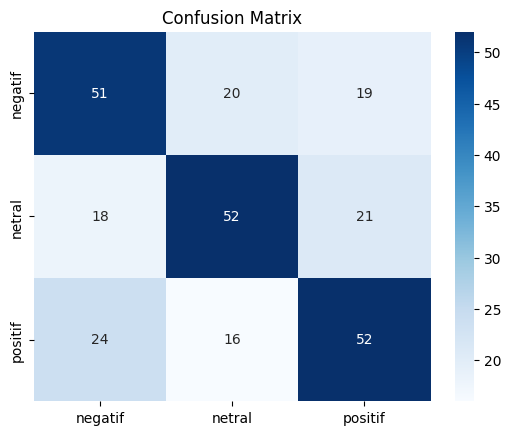

In [252]:
sns.heatmap(confusion_matrix(y_true = test_label, y_pred = prediksi),annot = True,fmt = "d",xticklabels=["negatif","netral","positif"], yticklabels=["negatif","netral","positif"],cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

In [253]:
accuracy = accuracy_score(y_true = test_label, y_pred = prediksi)
print(f"Accuracy CatBoost : {accuracy}")

Accuracy CatBoost : 0.5677655677655677


In [254]:
accuracy_catboost = accuracy

In [255]:
print(classification_report(y_true = test_label, y_pred = prediksi))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56        90
           1       0.59      0.57      0.58        91
           2       0.57      0.57      0.57        92

    accuracy                           0.57       273
   macro avg       0.57      0.57      0.57       273
weighted avg       0.57      0.57      0.57       273



## 3. Logistic Regression

In [309]:
from sklearn.linear_model import LogisticRegression

In [310]:
model_log = LogisticRegression(tol = 0.0001)

In [311]:
model_log.fit(train_data_vectorizer.toarray(), train_label)

LogisticRegression()

In [312]:
prediksi = model_log.predict(test_data_vectorizer.toarray())

In [313]:
accuracy_log = accuracy_score(y_true = test_label, y_pred = prediksi)
print(f"Accuracy Log Regression : {accuracy_log}")

Accuracy Log Regression : 0.6007326007326007


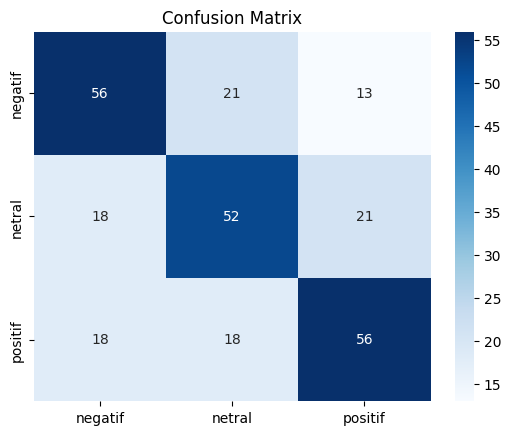

In [314]:
sns.heatmap(confusion_matrix(y_true = test_label, y_pred = prediksi),annot = True,fmt = "d",xticklabels=["negatif","netral","positif"], yticklabels=["negatif","netral","positif"],cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

## 3. Use MultiNomialNB

In [272]:
modelNBMultinomial = MultinomialNB()

In [273]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0],
    'fit_prior': [True, False],        
}


In [274]:
gridSearchModel = GridSearchCV(estimator = modelNBMultinomial,param_grid=param_grid, cv = 5)

In [275]:
gridSearchModel.fit(train_data_vectorizer.toarray(), train_label)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0],
                         'fit_prior': [True, False]})

In [276]:
modelNBMultinomial = gridSearchModel.best_estimator_

In [277]:
prediksi = modelNBMultinomial.predict(test_data_vectorizer.toarray())

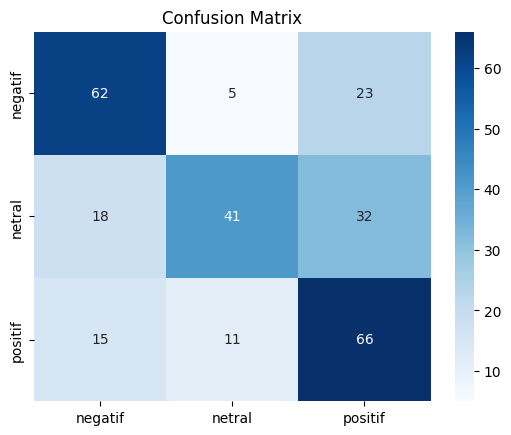

In [278]:
sns.heatmap(confusion_matrix(y_true = test_label, y_pred = prediksi),annot = True,fmt = "d",xticklabels=["negatif","netral","positif"], yticklabels=["negatif","netral","positif"],cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

In [279]:
accuracy = accuracy_score(y_true = test_label, y_pred = prediksi)
print(f"Accuracy MultiNomialNB : {accuracy}")

Accuracy MultiNomialNB : 0.6190476190476191


In [280]:
# with open('MultiNomialNB.pkl',"wb") as f : 
#     pickle.dump(model,f)

In [281]:
accuracy_multinomialNB = accuracy

## 4. Use BernoulliNB

In [282]:
modelNBBernoulli = BernoulliNB(alpha = 0.01, fit_prior = False)

In [283]:
param_grid = { 
    'binarize': [0.0, 0.1, 0.5, 0.9]     
}

In [284]:
gridSearchModel = GridSearchCV(estimator = modelNBBernoulli,param_grid=param_grid, cv = 5)

In [285]:
gridSearchModel.fit(train_data_vectorizer.toarray(), train_label)

GridSearchCV(cv=5, estimator=BernoulliNB(alpha=0.01, fit_prior=False),
             param_grid={'binarize': [0.0, 0.1, 0.5, 0.9]})

In [286]:
modelNBBernoulli = gridSearchModel.best_estimator_

In [287]:
prediksi = modelNBBernoulli.predict(test_data_vectorizer.toarray())

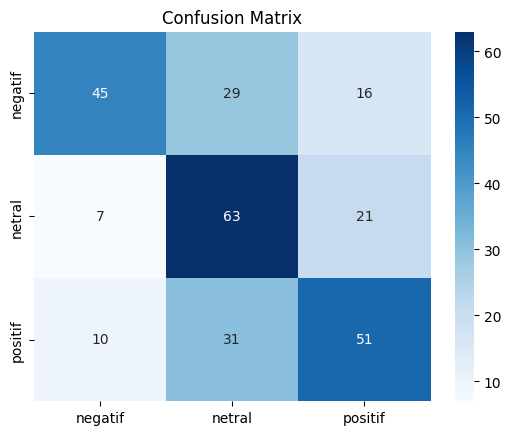

In [288]:
sns.heatmap(confusion_matrix(y_true = test_label, y_pred = prediksi),annot = True,fmt = "d",xticklabels=["negatif","netral","positif"], yticklabels=["negatif","netral","positif"],cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

In [289]:
accuracy = accuracy_score(y_true = test_label, y_pred = prediksi)
print(f"Accuracy BernoulliNB : {accuracy}")

Accuracy BernoulliNB : 0.5824175824175825


In [290]:
accuracy_bernoulliNB = accuracy

In [291]:
accuracy_bernoulliNB

0.5824175824175825

## 5. XGBoost Classifier

In [292]:
modelXGBoost = XGBClassifier(learning_rate = 0.01)

In [293]:
modelXGBoost.fit(train_data_vectorizer.toarray(), train_label)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [294]:
prediksi = modelXGBoost.predict(test_data_vectorizer.toarray())

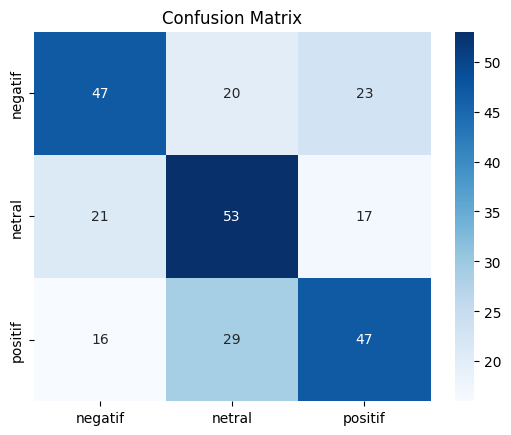

In [295]:
sns.heatmap(confusion_matrix(y_true = test_label, y_pred = prediksi),annot = True,fmt = "d",xticklabels=["negatif","netral","positif"], yticklabels=["negatif","netral","positif"],cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

In [296]:
accuracy = accuracy_score(y_true = test_label, y_pred = prediksi)
print(f"Accuracy XGBoost : {accuracy}")

Accuracy XGBoost : 0.5384615384615384


In [297]:
accuracy_xgboost = accuracy

Best Machine Learning Model in this Case : RandomForestClassifier

In [ ]:
accuracy_random_forest,accuracy_multinomialNB,accuracy_catboost,accuracy_bernoulliNB, accuracy_xgboost, accuracy_log

In [4]:
pd.DataFrame({"RandomForest":[accuracy_random_forest], "LogRegr":[accuracy_log],"Multinomial NB":[accuracy_multinomialNB], "CatBoost":[accuracy_catboost],"Bernoulli NB":[accuracy_bernoulliNB], "XGBoost":[accuracy_xgboost]}).T

,0
RandomForest,0.597070
LogRegr,0.600733
Multinomial NB,0.619048
CatBoost,0.567766
Bernoulli NB,0.582418
XGBoost,0.538462


In [316]:
from sklearn.ensemble import VotingClassifier

In [317]:
model_vote = VotingClassifier(estimators = [
    ("randomForest",modelRandomForest),
    ("multinomialNB",modelNBMultinomial),
    ("bernoulliNB",modelNBBernoulli),
    ("xgboost",modelXGBoost),
    ("logarithmRegre",model_log)
], weights = [4,5,3,2,4], n_jobs = -1, voting="hard")

In [318]:
model_vote.fit(train_data_vectorizer.toarray(), train_label)

VotingClassifier(estimators=[('randomForest',
                              RandomForestClassifier(min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('multinomialNB', MultinomialNB(fit_prior=False)),
                             ('bernoulliNB',
                              BernoulliNB(alpha=0.01, fit_prior=False)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_b...
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('logarithmRegre', LogisticRegression())],
                 n_jobs=-1, weights=[4, 5, 3, 2, 4])

In [319]:
prediksi = model_vote.predict(test_data_vectorizer.toarray())

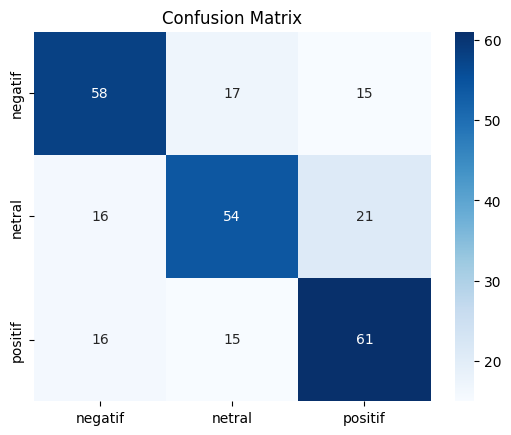

In [320]:
sns.heatmap(confusion_matrix(y_true = test_label, y_pred = prediksi),annot = True,fmt = "d",xticklabels=["negatif","netral","positif"], yticklabels=["negatif","netral","positif"],cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

In [321]:
accuracy = accuracy_score(y_true = test_label, y_pred = prediksi)
print(f"Accuracy Voting Classifier : {accuracy}")

Accuracy Voting Classifier : 0.6336996336996337


In [322]:
accuracy_voting_classifier = accuracy

In [ ]:
# import pickle
# with open("model_voting.pkl",'wb') as f : 
#     pickle.dump(model_vote, f)

In [324]:
data_kumpulan = [accuracy_random_forest, accuracy_xgboost, accuracy_multinomialNB, accuracy_bernoulliNB, accuracy_log,accuracy_voting_classifier]

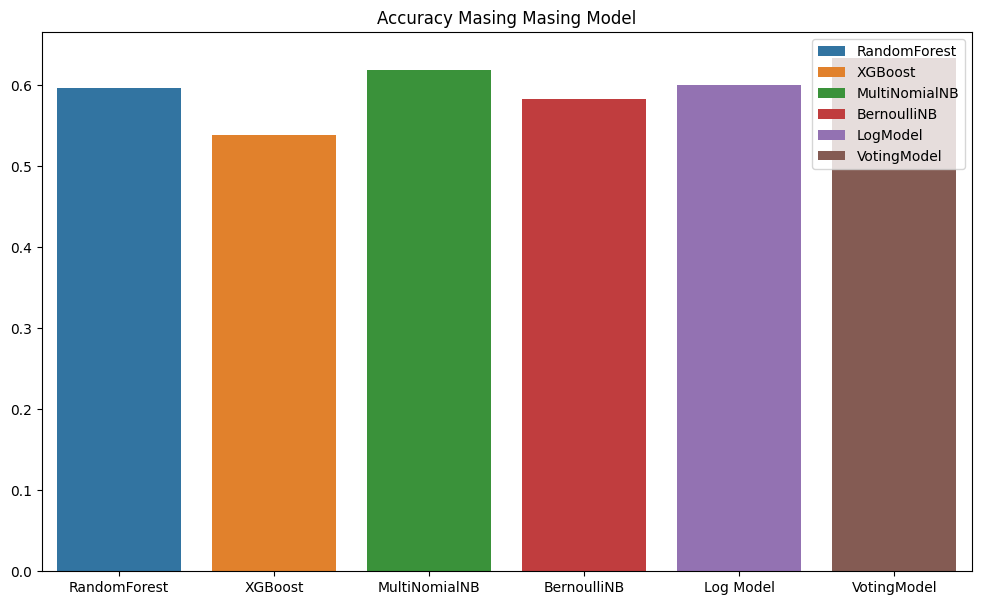

In [328]:
plt.figure(figsize = (12,7))
sns.barplot(x = ["RandomForest","XGBoost","MultiNomialNB",'BernoulliNB',"Log Model","VotingModel"], y = data_kumpulan, hue = ["RandomForest","XGBoost","MultiNomialNB",'BernoulliNB',"LogModel","VotingModel"], palette="tab10")
plt.title("Accuracy Masing Masing Model")
plt.show()

In [327]:
print(classification_report(y_true = test_label, y_pred = prediksi))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        90
           1       0.63      0.59      0.61        91
           2       0.63      0.66      0.65        92

    accuracy                           0.63       273
   macro avg       0.63      0.63      0.63       273
weighted avg       0.63      0.63      0.63       273



## 6. USE Neural Network Model

In [332]:
data["tweet"]

0       Kata @prabowo Indonesia tidak dihargai bangsa ...
1       Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2       Di era Jokowi, ekonomi Indonesia semakin baik....
3       Bagi Sumatera Selatan, Asian Games berdampak p...
4       Negara kita ngutang buat bngun infrastruktur y...
                              ...                        
1810    Negarawan sejati sll bangga dan mengedepankan ...
1811    1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812    Mari bangun bangsa dgn mendukung perekonomian ...
1813    Bantu majukan perekonomian bangsa bersama Pak ...
1814    Pak @jokowi mengubah cara pandang ekonomi. Kin...
Name: tweet, Length: 1815, dtype: object

In [333]:
def preProcessText(text) : 
    global kata_tidak_baku
    # lemma_model = Lemmatizer()
    hasil = []
    # stopWord_List = StopWord().get_stopword()
    # for janganHapus in ["tidak","bukan","gak","tdk","bkn","belum","jangan"] : 
    #     if janganHapus in stopWord_List : 
    #         stopWord_List.remove(janganHapus)
    # stopWord_List.extend(["yg", "aja", "ya", "kalo", "nya", "utk", "untuk"])
    for sentence in text : 
        sentence = sentence.lower()
        sentence = re.sub("(https?://[^\s]+|pic.[^\s]+)", repl = " ",string = sentence)
        sentence = re.sub(pattern = "@[^\s]+", repl = " ", string = sentence)
        sentence = re.sub(pattern = "#[^\s]+", repl = " ", string = sentence)
        sentence = re.sub(pattern = "[^a-zA-Z\s]", repl = " ", string = sentence)
        sentence = re.sub(pattern = "\s+",repl = " ", string = sentence)
        sentence = pipe(sentence)
        sementara = []
        for word in sentence.split(" ") : 
            if word in kata_tidak_baku.keys() : 
                sementara.append(kata_tidak_baku[word])
            else : 
                sementara.append(word)
                    
        sentence = " ".join(sementara).strip()
        hasil.append(sentence)
    return hasil

In [334]:
train_data, test_data, train_label, test_label = train_test_split(data.iloc[:,-1],data.iloc[:,0], test_size = 0.2, random_state=48, stratify=data.iloc[:,0])

In [335]:
train_data = preProcessText(train_data)
test_data = preProcessText(test_data)

In [336]:
train_label = LABELENCODER.transform(train_label)
test_label = LABELENCODER.transform(test_label)

In [337]:
model_tokenizer = Tokenizer(num_words = 4000)

In [338]:
model_tokenizer.index_word

{}

In [339]:
model_tokenizer.fit_on_texts(train_data)

In [340]:
model_tokenizer.index_word.values()

dict_values(['yang', 'tidak', 'ekonomi', 'dan', 'prabowo', 'jokowi', 'di', 'pak', 'gaji', 'itu', 'sandi', 'presiden', 'ini', 'harga', 'indonesia', 'akan', 'saya', 'untuk', 'kalau', 'dengan', 'bisa', 'jadi', 'dari', 'tapi', 'sudah', 'saja', 'iya', 'mau', 'rakyat', 'salah', 'ke', 'ada', 'karena', 'negara', 'ambil', 'sama', 'juga', 'kita', 'bukan', 'apa', 'jika', 'nya', 'orang', 'lebih', 'dalam', 'mereka', 'kami', 'pada', 'hanya', 'kamu', 'lagi', 'kerja', 'debat', 'dia', 'makro', 'saat', 'pertumbuhan', 'tahun', 'pajak', 'pemimpin', 'adalah', 'banyak', 'bapak', 'semua', 'terpilih', 'kan', 'cuma', 'lain', 'memang', 'anda', 'baik', 'janji', 'game', 'jangan', 'masih', 'seperti', 'lah', 'arah', 'bilang', 'sekarang', 'sih', 'sebelum', 'anak', 'perekonomian', 'sebagai', 'terus', 'satu', 'buat', 'menjadi', 'naik', 'sangat', 'kok', 'soal', 'harus', 'pokok', 'bahkan', 'oleh', 'bangsa', 'kesalahan', 'tahu', 'bahan', 'kepada', 'surabaya', 'baru', 'pembangunan', 'gajinya', 'begitu', 'ingin', 'murah', 

In [341]:
train_data_vectorizer = model_tokenizer.texts_to_sequences(train_data)

In [342]:
maks_panjang = max([len(token) for token in train_data_vectorizer])
maks_panjang

58

In [343]:
train_data_vectorizer = pad_sequences(train_data_vectorizer,maxlen = 70)

In [344]:
train_data_vectorizer.shape

(1452, 70)

In [345]:
test_data_vectorizer = model_tokenizer.texts_to_sequences(test_data)
test_data_vectorizer = pad_sequences(test_data_vectorizer,maxlen = 70)

In [346]:
# def modeling(HP : kt.HyperParameters) : 
#     model = Sequential()
    
#     model.add(Input([100]))
#     model.add(Embedding(input_dim = 4001, output_dim = HP.Int(min_value = 64,max_value = 256,step = 32, name = "Embedding")))
    
#     model.add(Bidirectional(LSTM(units = HP.Int(min_value = 64,max_value = 256,step = 32, name = "LSTM"))))
    
#     model.add(Dense(units = HP.Int(min_value = 16,max_value = 128,step = 32, name = "Dense1"), activation = "relu",kernel_regularizer = l2(l2 = HP.Float(min_value = 0.001,max_value = 0.01,sampling = "log", name = "L2_1"))))
#     model.add(BatchNormalization())
#     model.add(Dropout(rate = HP.Float(min_value = 0.3, max_value=0.8,step = 0.1, name = "DO_1")))

#     model.add(Dense(units = 3, activation = "softmax"))

#     model.compile(loss = "sparse_categorical_crossentropy", optimizer = RMSprop(HP.Float(min_value = 0.001,max_value = 0.1,sampling = "log", name = "learn_rate")),metrics = ["accuracy"])
    
#     return model
# hyperband = kt.Hyperband(
#     modeling,
#     objective="val_accuracy",
#     factor = 3,
#     max_epochs = 30,
#     seed = 42,
#     directory = "HyperBand-1"
# )
# hyperband.search(train_data_vectorizer, train_label, validation_data = (test_data_vectorizer,test_label), epochs = 100, batch_size = 16)
# best_model = hyperband.get_best_models()[0]
# best_model.summary()
# best_model.fit(train_data_vectorizer, train_label, callbacks = EarlyStopping(monitor = "val_loss",patience = 3, restore_best_weights = True), epochs = 20, validation_data=(test_data_vectorizer,test_label))


In [347]:
train_data

['prabowo sandi karena gaji mereka selama tahun akan di sumbangkan ke kaum duafa dan fakir miskin',
 'jika terpilih prabowo sandi tidak akan ambil gaji sepeser pun',
 'alhamdulillah capres mau sedekahkan gajinya untuk rakyat miskin disini kami korban gempa pasigala butuh bantuan pak',
 'menang pilpres prabowo sandi komitmen tidak ambil gaji walapun serupiah lewat',
 'pak prabowo dan pak sandi lebih mengerti dan memahami masalah ekonomi di negeri ini dan tahu solusinya makin mantao saja untuk prabowo sandi',
 'alhamdulillah sukses mudah an ekonomi syariah semakin maju kedepannya',
 'subsidi yang tepat sasaran itu baik semua pasti setuju tapi kalau bicara daya beli masyarakat melemah sesaui dengan topik ekonomi yang kita bahas apa pada tidak setuju',
 'jokowi kma pemimpin optimis beberapa penghargaan yang dianugerahkan kepadanya menjadi bukti bahwa adalah sosok pemimpin yang diakui integritasnya',
 'yakin dan optimis jokowi bisa menjawab persoalan rakyat terkait ekonomi dan kesejahteraan

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3416 - loss: 1.2042 - val_accuracy: 0.3388 - val_loss: 1.2026
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3340 - loss: 1.2015 - val_accuracy: 0.3361 - val_loss: 1.2002
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3657 - loss: 1.1972 - val_accuracy: 0.3388 - val_loss: 1.1978
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3939 - loss: 1.1939 - val_accuracy: 0.3554 - val_loss: 1.1954
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4008 - loss: 1.1913 - val_accuracy: 0.3554 - val_loss: 1.1932
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4125 - loss: 1.1892 - val_accuracy: 0.3554 - val_loss: 1.1910
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4084 - loss: 1.1856 - val_accuracy: 0.3609 - val_loss: 1.1888
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4125 - loss: 1.1834 - val_accuracy: 0.3609 - 

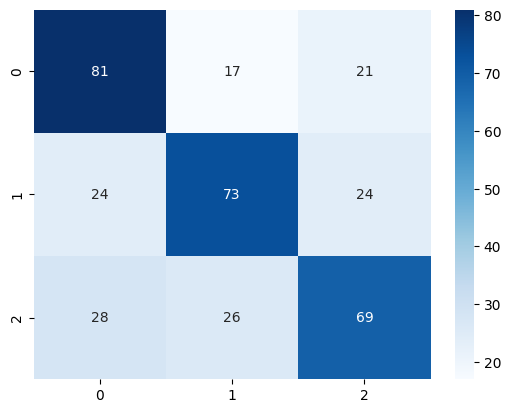

In [385]:
model_simpleRNN = Sequential()
model_simpleRNN.add(Input([70]))
model_simpleRNN.add(Embedding(input_dim = 4001, output_dim = 32))

model_simpleRNN.add(SimpleRNN(units = 64, activation = "relu", kernel_regularizer = l2(l2 = 0.001)))
    
model_simpleRNN.add(Dense(units = 64, activation = "relu",kernel_regularizer = l2(l2 =0.001)))
model_simpleRNN.add(Dropout(rate =0.4))

model_simpleRNN.add(Dense(units = 3, activation = "softmax"))

model_simpleRNN.compile(loss = "sparse_categorical_crossentropy", optimizer = RMSprop(learning_rate=5e-5),metrics = ["accuracy"])

history_simpleRNN = model_simpleRNN.fit(train_data_vectorizer, train_label, validation_data = (test_data_vectorizer,test_label), epochs = 100, batch_size = 16, callbacks = EarlyStopping(patience = 20,monitor = "val_accuracy",restore_best_weights=True))


prediksi = model_simpleRNN.predict(test_data_vectorizer)
sns.heatmap(confusion_matrix(y_pred = np.argmax(prediksi,-1),y_true = test_label),annot = True,fmt = "d",cmap="Blues")
acc_simpleRNN = accuracy_score(y_pred = np.argmax(prediksi,-1),y_true = test_label)
print(f"Accuracy Score : {acc_simpleRNN}")

In [386]:
len(history_simpleRNN.history["loss"])

93

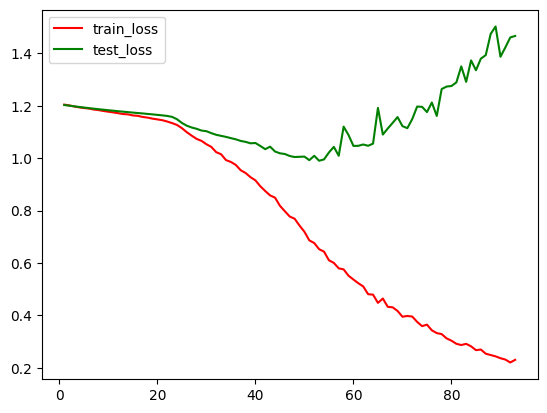

In [389]:
sns.lineplot(x = range(1,len(history_simpleRNN.history["loss"])+1), y = history_simpleRNN.history["loss"], label = "train_loss", color = "red")
sns.lineplot(x = range(1,len(history_simpleRNN.history["loss"])+1), y = history_simpleRNN.history["val_loss"], color = "green", label = "test_loss")
plt.legend()
plt.show()

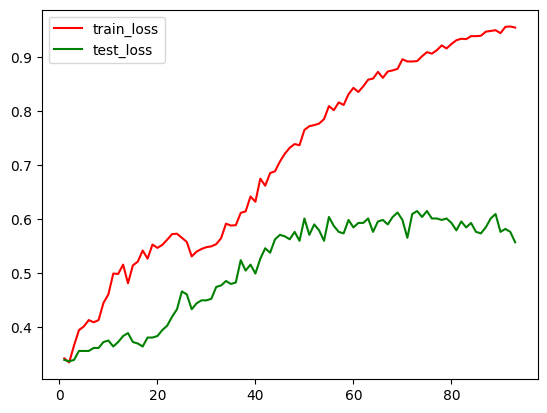

In [390]:
sns.lineplot(x = range(1,len(history_simpleRNN.history["loss"])+1), y = history_simpleRNN.history["accuracy"], label = "train_loss", color = "red")
sns.lineplot(x = range(1,len(history_simpleRNN.history["loss"])+1), y = history_simpleRNN.history["val_accuracy"], color = "green", label = "test_loss")
plt.legend()
plt.show()

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3292 - loss: 1.1280 - val_accuracy: 0.3802 - val_loss: 1.1263
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3747 - loss: 1.1253 - val_accuracy: 0.4380 - val_loss: 1.1239
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4153 - loss: 1.1223 - val_accuracy: 0.4931 - val_loss: 1.1202
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4421 - loss: 1.1177 - val_accuracy: 0.4711 - val_loss: 1.1151
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4511 - loss: 1.1104 - val_accuracy: 0.4573 - val_loss: 1.1067
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4635 - loss: 1.1002 - val_accuracy: 0.4353 - val_loss: 1.0979
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4580 - loss: 1.0905 - val_accuracy: 0.4215 - val_loss: 1.0909
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4532 - loss: 1.0829 - val_accuracy: 0.4545 -

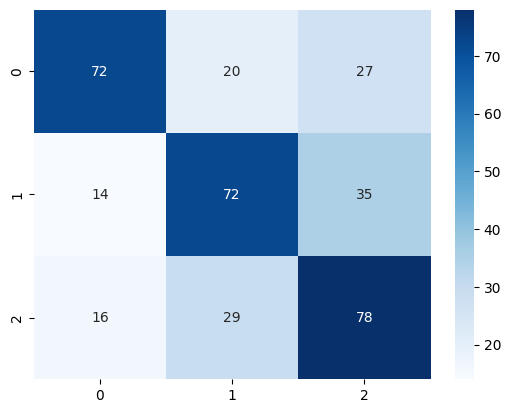

In [414]:
model_LSTM = Sequential()
model_LSTM.add(Input([70]))
model_LSTM.add(Embedding(input_dim = 4001, output_dim = 32))

model_LSTM.add(LSTM(units = 32))
    
model_LSTM.add(Dense(units = 32, activation = "relu",kernel_regularizer = l2(l2 =0.001)))
model_LSTM.add(Dropout(rate =0.4))

model_LSTM.add(Dense(units = 3, activation = "softmax"))

model_LSTM.compile(loss = "sparse_categorical_crossentropy", optimizer = RMSprop(learning_rate=0.0001),metrics = ["accuracy"])

history_LSTM = model_LSTM.fit(train_data_vectorizer, train_label, validation_data = (test_data_vectorizer,test_label), epochs = 100, batch_size = 16, callbacks = EarlyStopping(patience = 20,monitor = "val_accuracy",restore_best_weights=True))


prediksi = model_LSTM.predict(test_data_vectorizer)
sns.heatmap(confusion_matrix(y_pred = np.argmax(prediksi,-1),y_true = test_label),annot = True,fmt = "d",cmap="Blues")
acc_LSTM = accuracy_score(y_pred = np.argmax(prediksi,-1),y_true = test_label)
print(f"Accuracy Score : {acc_LSTM}")

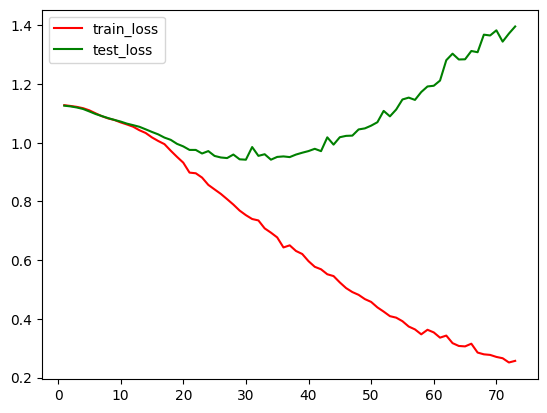

In [417]:
sns.lineplot(x = range(1,len(history_LSTM.history["loss"])+1), y = history_LSTM.history["loss"], label = "train_loss", color = "red")
sns.lineplot(x = range(1,len(history_LSTM.history["loss"])+1), y = history_LSTM.history["val_loss"], color = "green", label = "test_loss")
plt.legend()
plt.show()

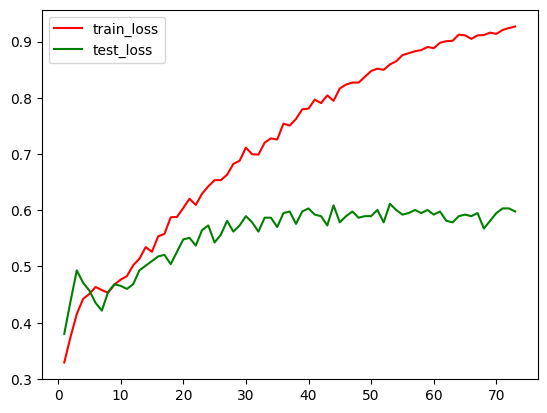

In [418]:
sns.lineplot(x = range(1,len(history_LSTM.history["loss"])+1), y = history_LSTM.history["accuracy"], label = "train_loss", color = "red")
sns.lineplot(x = range(1,len(history_LSTM.history["loss"])+1), y = history_LSTM.history["val_accuracy"], color = "green", label = "test_loss")
plt.legend()
plt.show()

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3437 - loss: 1.1419 - val_accuracy: 0.3499 - val_loss: 1.1406
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3795 - loss: 1.1373 - val_accuracy: 0.3884 - val_loss: 1.1376
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4105 - loss: 1.1344 - val_accuracy: 0.4132 - val_loss: 1.1347
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4731 - loss: 1.1272 - val_accuracy: 0.4160 - val_loss: 1.1322
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4966 - loss: 1.1234 - val_accuracy: 0.4545 - val_loss: 1.1294
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5145 - loss: 1.1194 - val_accuracy: 0.4545 - val_loss: 1.1268
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5275 - loss: 1.1140 - val_accuracy: 0.4738 - val_loss: 1.1239
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5661 - loss: 1.1090 - val_accuracy: 0.4821 - v

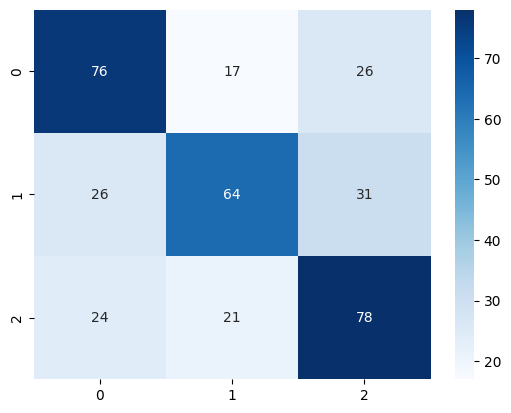

In [409]:
model_CNN = Sequential()
model_CNN.add(Input([70]))
model_CNN.add(Embedding(input_dim = 4001, output_dim = 32))

model_CNN.add(Conv1D(64, kernel_size = 2, strides=2))
model_CNN.add(GlobalMaxPooling1D())
    
model_CNN.add(Dense(units = 32, activation = "relu",kernel_regularizer = l2(l2 =0.001)))
model_CNN.add(Dropout(rate =0.3))

model_CNN.add(Dense(units = 3, activation = "softmax"))

model_CNN.compile(loss = "sparse_categorical_crossentropy", optimizer = RMSprop(learning_rate=0.0001),metrics = ["accuracy"])

history_CNN = model_CNN.fit(train_data_vectorizer, train_label, validation_data = (test_data_vectorizer,test_label), epochs = 100, batch_size = 16, callbacks = EarlyStopping(patience = 20,monitor = "val_accuracy",restore_best_weights=True))


prediksi = model_CNN.predict(test_data_vectorizer)
sns.heatmap(confusion_matrix(y_pred = np.argmax(prediksi,-1),y_true = test_label),annot = True,fmt = "d",cmap="Blues")
acc_CNN = accuracy_score(y_pred = np.argmax(prediksi,-1),y_true = test_label)
print(f"Accuracy Score : {acc_CNN}")

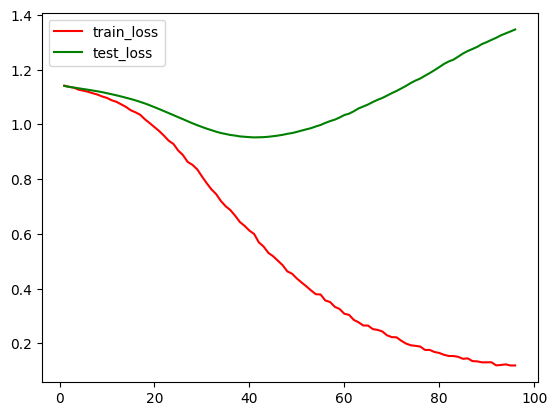

In [412]:
sns.lineplot(x = range(1,len(history_CNN.history["loss"])+1), y = history_CNN.history["loss"], label = "train_loss", color = "red")
sns.lineplot(x = range(1,len(history_CNN.history["loss"])+1), y = history_CNN.history["val_loss"], color = "green", label = "test_loss")
plt.legend()
plt.show()

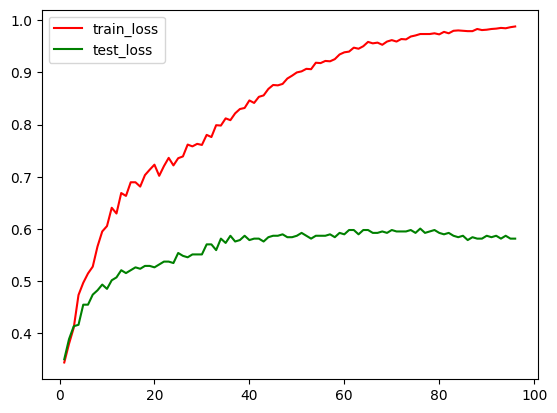

In [413]:
sns.lineplot(x = range(1,len(history_CNN.history["loss"])+1), y = history_CNN.history["accuracy"], label = "train_loss", color = "red")
sns.lineplot(x = range(1,len(history_CNN.history["loss"])+1), y = history_CNN.history["val_accuracy"], color = "green", label = "test_loss")
plt.legend()
plt.show()

In [ ]:
# with open("CNN_MODEL.pkl","wb") as f : 
#     pickle.dump(model_CNN, f)

In [ ]:
# with open("LSTM_MODEL.pkl","wb") as f : 
#     pickle.dump(model_LSTM,f)

In [ ]:
# with open("RNNSIMPLE_MODEL.pkl","wb") as f : 
#     pickle.dump(model_simpleRNN,f)

In [451]:
kumpulan_accuracy_nn = [acc_LSTM,acc_CNN,acc_simpleRNN]
kumpulan_accuracy_nn

[0.6115702479338843, 0.6005509641873278, 0.6143250688705234]

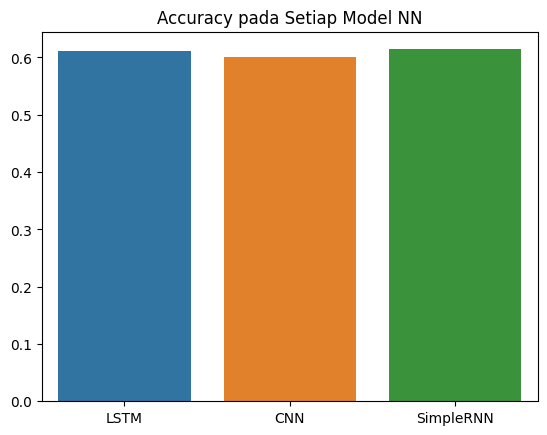

In [455]:
sns.barplot(x = ["LSTM","CNN","SimpleRNN"], y = kumpulan_accuracy_nn, hue = ["LSTM","CNN","SimpleRNN"])
plt.title("Accuracy pada Setiap Model NN")
plt.show()

## 7. Transformers Model [Hidden State + Neural Network]

In [482]:
from transformers import AutoModel, AutoTokenizer
from datasets import Dataset, ClassLabel

In [466]:
data.rename(columns = {"sentimen":"label","tweet":"text"}, inplace = True)

In [493]:
data["text"] = preProcessText(data["text"])

In [496]:
dataForTransformers = Dataset.from_pandas(data)

In [497]:
def func(batch) : 
    x = batch["label"]
    hasil = []
    mappingDict = {"negatif":0,"netral":1,"positif":2}
    for d in x : 
        hasil.append(mappingDict[d])
    return {"label" : hasil}

In [498]:
dataForTransformers = dataForTransformers.map(func, batched = True, batch_size = None)

Map: 100%|██████████| 1815/1815 [00:00<00:00, 187513.22 examples/s]


In [499]:
dataForTransformersSplitted = dataForTransformers.cast_column("label",ClassLabel(names = [0,1,2]))

Casting the dataset: 100%|██████████| 1815/1815 [00:00<00:00, 424979.72 examples/s]


In [500]:
dataForTransformersSplitted = dataForTransformersSplitted.train_test_split(test_size = 0.2, stratify_by_column="label",seed = 42)

In [ ]:
# model_tokenizer_transformer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
# model_transformer = AutoModel.from_pretrained("indobenchmark/indobert-base-p1")
# Karena ada conflict dengan PyTorch dan TensorFlow untuk Transformers bakal dilakukan di file code yang berbeda